base_liine= 1.0784218684734683
its_3_xy  = (1.7111391831930813, 8.157560008224653)
ke-posi_xy= (1.6000697155523085, 8.072333408163432)


'\nline_mid_1_to_ext_1 = LineString([mid_1_xy, (ext_1.x,ext_1.y)])\next_p1 = line_mid_1_to_ext_1.intersection(line_left)\next_p1_xy = ( ext_p1.x, ext_p1.y)\next_p2_xy = (-ext_p1.x, ext_p1.y)\n#\nline_left  = LineString([ext_p1_xy, cxy])\nline_right = LineString([ext_p2_xy, cxy])\n#\nxs, ys = line_left.xy\nax.plot(xs, ys, alpha=0.7, color=\'green\', linewidth=0.8, solid_capstyle=\'round\', zorder=10)\n#\nxs, ys = line_right.xy\nax.plot(xs, ys, alpha=0.7, color=\'green\', linewidth=0.8, solid_capstyle=\'round\', zorder=10)\n#\nax.set_title(\'rcm-12 15°\', fontsize=16)\nplot.savefig("rcm-12-8D.png",format="png",dpi=150)\n#\nthat_point    = affinity.rotate(point_1, 7*15, cxy)\nthat_point_xy = (that_point.x, that_point.y)\nthat_cir = shapely_Arc(that_point_xy, d1, 0, 360)\nxs, ys = that_cir.xy\nax.plot(xs, ys, alpha=0.7, color=\'red\', linewidth=0.8, solid_capstyle=\'round\', zorder=10)\n#\nax.set_title(\'rcm-12 15°\', fontsize=16)\nplot.savefig("rcm-12-9A.png",format="png",dpi=150)\n#\n'

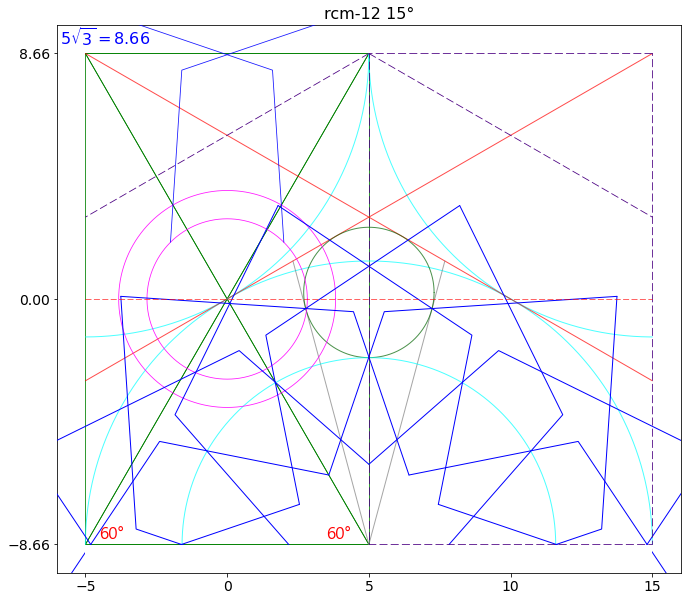

In [4]:
# (home)/Anthony-J-Lee/
# A_J_Lee_pattern-2.ipynb
# 2021-10-26
# python 3.8.2
#
# run on https://repl.it
# run on ubuntu 18.04 LTS
#
# 要執行本程式, 請按上方run▶
#
# to fix matplotlib warning
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
#
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.font_manager as fontManager
from shapely import affinity
from shapely.geometry import LineString, Point
#
# 定義圖面函數
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 1.6   # cm
    right_margin = 1.6  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.6    # cm
    bottom_margin = 1.6 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
    #
# end of def
#
# Define the arc
# center position is cxy = (cx, cy)
# start_angle, end_angle is in degrees
#
def shapely_Arc(cxy, r, start_angle, end_angle) :
    #
    numsegments = 1440
    # The coordinates of the arc
    theta = np.radians(np.linspace(start_angle, end_angle, numsegments))
    x = cxy[0] + r * np.cos(theta)
    y = cxy[1] + r * np.sin(theta)
    Arc = LineString(np.column_stack([x, y]))
    return Arc
    #
# end of def
#
def motif_line(LS, COLOR, ZORDER, LINEWIDTH) :
    #
    xs, ys = LS.xy
    ax.plot(xs, ys, color=COLOR, alpha=0.7, linewidth=LINEWIDTH, solid_capstyle='round', zorder=ZORDER)
    return
# end def
#
def motif_fill(LS, color, ZORDER, Alpha) :
    #
    xs, ys = LS.xy
    ax.fill(xs, ys, alpha=Alpha, closed=True, edgecolor=None, facecolor=color, fill=True, zorder=ZORDER)
    return
#
# ------------------------------------------------------------
#
# A4 紙張大小是 21.0cm x 29.7cm
# dy = r0+ty
dx = 5.0
dy = 8.660254037844386
tup7 = set_graphic_area(4*dx+2, 2*dy+2)
# 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
fig = plot.figure(figsize=(tup7[0], tup7[1]))
# 圖表的繪圖區域被分為1個子圖, 1 row, 1 column, plot to index 1
ax = fig.add_subplot(1,1,1)
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
# 設定X軸的顯示範圍, from xmin to xmax
plot.xlim(-6, 16)
# 設定Y軸的顯示範圍, from ymin to ymax
plot.ylim(-dy-1, dy+1)
# get current axes, set X,Y same ratio & scale
plot.gca().set_aspect('equal', adjustable='box') 
#
xvalues = [-5,0,5,10,15]
yvalues = [-dy,0,dy]
plot.xticks(xvalues)
plot.yticks(yvalues)
plot.tick_params(labelsize=14)
#
plot.grid(False)
ax.set_axis_on()    # will turn on  grid line
# ax.set_axis_off() # will turn off grid line
#
# ---------------------------------------------------------
#
r0 = 5
cxy = (0,0)
myfont = fontManager.FontProperties(fname='../Ecliptic/draw/fonts/msjh.ttc')
#
# find its_1 distance
pA = ( r0, r0)
pB = (-r0, r0)
pC = (-r0,-r0)
pD = ( r0,-r0)
#
line_1 = LineString([pA, pC])
line_2 = LineString([pB, pD])
line_3 = affinity.rotate(line_1, 15, pC)
line_4 = affinity.rotate(line_2,-15, pD)
#
its_1    = line_3.intersection(line_4)
its_1_xy = (its_1.x, its_1.y)
#
tx = 0
ty = its_1_xy[1]
#
pA = ( r0, r0+ty)
pB = (-r0, r0+ty)
pC = (-r0,-r0-ty)
pD = ( r0,-r0-ty)
#
tmp_1 = LineString([pC, cxy])
tmp_2 = LineString([pD, cxy])
tmp_3 = LineString([pC, pD])
#
for tmp in (tmp_1, tmp_2, tmp_3) :
    xs, ys = tmp.xy
    ax.plot(xs, ys, color='green', alpha=1.0, linewidth=0.8, solid_capstyle='round', zorder=10) 
# end for
#
plot.savefig('./png/fig-03A.png', format="png", dpi=300)
#
for tmp in (tmp_1, tmp_2, tmp_3) :
    r_tmp = affinity.rotate(tmp, 180, cxy)
    xs, ys = r_tmp.xy
    ax.plot(xs, ys, color='green', alpha=1.0, linewidth=0.8, solid_capstyle='round', zorder=10) 
# end for
#
plot.savefig('./png/fig-03B.png', format="png", dpi=300)
#
square_xy = [pA, pB, pC, pD, pA]
square    = LineString(square_xy)
#
line_1 = LineString([pA, pC])
line_2 = LineString([pB, pD])
#
# now its_1 will be cxy
#
for item in (square, line_1, line_2) :
    xs, ys = item.xy
    ax.plot(xs, ys, color='green', alpha=1.0, linewidth=0.8, solid_capstyle='round', zorder=10) 
# end for
#
plot.savefig('./png/fig-03C.png', format="png", dpi=300)
#
text1_xy = (-r0-0.9, 5*np.sqrt(3)+0.25)
ax.annotate(r'$5\sqrt{3}=8.66$', text1_xy,
            color='blue',
            fontproperties=myfont,
            fontsize=16, 
            zorder=10)
#
text2_xy = (r0-1.5, -r0-ty+0.2)
ax.annotate("60°", text2_xy,
            color='red',
            fontproperties=myfont,
            fontsize=16, 
            zorder=10)
#
text3_xy = (-r0+0.5, -r0-ty+0.2)
ax.annotate("60°", text3_xy,
            color='red',
            fontproperties=myfont,
            fontsize=16, 
            zorder=10)
#
plot.savefig('./png/fig-03D.png', format="png", dpi=300)
#
line_AD = LineString([pA, pD])
line_AB = LineString([pA, pB])
line_BC = LineString([pB, pC])
line_CD = LineString([pC, pD])
#
line_AC = LineString([pA, pC])
line_AC_rN30 = affinity.rotate(line_AC,-30, pA)
#
its_D= line_AC_rN30.intersection(line_BC)
its_D_xy = (its_D.x, its_D.y)
#
line_A_itsD = LineString([pA, its_D_xy])
xs, ys = line_A_itsD.xy
ax.plot(xs, ys, color='indigo', alpha=1.0, linewidth=0.8, dashes=[10, 4, 10, 4], solid_capstyle='round', zorder=20)
#
plot.savefig('./png/fig-03E.png', format="png", dpi=300)
#
tx = Point(pC).distance(Point(pD))
tR_square = affinity.translate(square, tx, 0, 0)
xs, ys = tR_square.xy
ax.plot(xs, ys, color='indigo', alpha=1.0, linewidth=0.8, dashes=[10, 4, 10, 4], solid_capstyle='round', zorder=20)
#
plot.savefig('./png/fig-03F.png', format="png", dpi=300)
#
H_line = LineString([(-5,0),(15,0)])
xs, ys = H_line.xy
ax.plot(xs, ys, color='red', alpha=1.0, linewidth=0.6, dashes=[10, 4, 10, 4], solid_capstyle='round', zorder=20)
#
plot.savefig('./png/fig-03G.png', format="png", dpi=300)
#
cir_down_1 = shapely_Arc(( r0,-r0*np.sqrt(3)), 2*r0, 0, 180)
cir_upL  = shapely_Arc((-r0, r0*np.sqrt(3)), 2*r0, 270, 360)
cir_upR  = shapely_Arc((3*r0, r0*np.sqrt(3)), 2*r0, 180, 270)
motif_line(cir_down_1, 'cyan', 10, 1.0)
motif_line(cir_upL,  'cyan', 10, 1.0)
motif_line(cir_upR,  'cyan', 10, 1.0)
#
plot.savefig('./png/fig-03H.png', format="png", dpi=300)
#
up_H_line_1_xy = [(-3*r0,r0*np.sqrt(3)), (3*r0,r0*np.sqrt(3))]
up_H_line_2_xy = [(-1*r0,r0*np.sqrt(3)), (5*r0,r0*np.sqrt(3))]
up_H_line_1    = LineString(up_H_line_1_xy)
up_H_line_2    = LineString(up_H_line_2_xy)
up_H_line_1_rP30 = affinity.rotate(up_H_line_1, 30, ( 3*r0, r0*np.sqrt(3)))
up_H_line_2_rN30 = affinity.rotate(up_H_line_2,-30, (-1*r0, r0*np.sqrt(3)))
V_line_L = LineString([( -r0,-r0*np.sqrt(3)), (-r0,  r0*np.sqrt(3))])
V_line_R = LineString([(3*r0,-r0*np.sqrt(3)), (3*r0, r0*np.sqrt(3))])
#
its_L1 = V_line_L.intersection(up_H_line_1_rP30)
its_R1 = V_line_R.intersection(up_H_line_2_rN30)
its_L1_xy = (its_L1.x, its_L1.y)
its_R1_xy = (its_R1.x, its_R1.y)
#
line_RU_its_L1 = LineString([(3*r0, r0*np.sqrt(3)), its_L1_xy])
line_LU_its_R1 = LineString([( -r0, r0*np.sqrt(3)), its_R1_xy])
motif_line(line_RU_its_L1, 'red', 10, 1.0)
motif_line(line_LU_its_R1, 'red', 10, 1.0)
#
plot.savefig('./png/fig-03I.png', format="png", dpi=300)
#
r_P120_line_A_itsD = affinity.rotate(line_A_itsD, 120, pA)
xs, ys = r_P120_line_A_itsD.xy
ax.plot(xs, ys, color='indigo', alpha=1.0, linewidth=0.8, dashes=[10, 4, 10, 4], solid_capstyle='round', zorder=20)
#
line_3 = affinity.rotate(line_2, -15, pD)
line_4 = affinity.rotate(line_2, -45, pD)
its_41 = line_RU_its_L1.intersection(line_3)
its_51 = line_LU_its_R1.intersection(line_4)
its_41_xy = ( its_41.x, its_41.y)
its_51_xy = ( its_51.x, its_51.y)
#
tmp_4 = LineString([its_41_xy, pD])
tmp_5 = LineString([its_51_xy, pD])
tmp_6 = affinity.rotate(tmp_4, 52.5, its_41_xy)
motif_line(tmp_4, 'gray', 10, 1.0)
motif_line(tmp_5, 'gray', 10, 1.0)
#
plot.savefig('./png/fig-03J.png', format="png", dpi=300)
#
its_61 = LineString([(r0,-r0*np.sqrt(3)), (r0,r0*np.sqrt(3))]).intersection(tmp_6)
its_61_xy = ( its_61.x, its_61.y)
cir_center = shapely_Arc(its_61_xy, 2.3, 0, 360)
motif_line(cir_center, 'darkgreen', 10, 1.0)
#
# motif_line(tmp_6, 'black', 10, 0.8)
# plot.savefig('./png/fig-03K.png', format="png", dpi=300)
#
its_70 = LineString([(r0,-r0*np.sqrt(3)), (r0,r0*np.sqrt(3))]).intersection(cir_center)
its_71 = its_70[0]
d1 = its_71.distance(Point(pD))
cir_down_2 = shapely_Arc((r0,-r0*np.sqrt(3)), d1, 0, 180)
motif_line(cir_down_2, 'cyan', 10, 1.0)
#
plot.savefig('./png/fig-03L.png', format="png", dpi=300)
#
r10 = 8.92
point_1_xy = (r10,0)
point_2_xy = (r10*np.cos(5*np.pi/12), r10*np.sin(5*np.pi/12))
point_3_xy = (r10*np.cos(7*np.pi/12), r10*np.sin(7*np.pi/12))
point_1    = Point(point_1_xy)
point_2    = Point(point_2_xy)
point_3    = Point(point_3_xy)
d1 = point_2.distance(point_3) / 2
d2 = r10 - d1
#
Hline = LineString([(r10+d1,0), (-r10-d1,0)])
line_left  = affinity.rotate(Hline,105, cxy)
line_right = affinity.rotate(Hline, 75, cxy)
#
cir_2 = shapely_Arc(cxy, d2, 0, 360)
#
line_p2_p3 = LineString([point_2_xy, point_3_xy])
bisector_degree = (90-15)/2
mid_1 = line_p2_p3.interpolate(0.5, normalized = True)
mid_2 = affinity.rotate(mid_1, 90-15, point_2_xy)
mid_1_xy = (mid_1.x, mid_1.y)
mid_2_xy = (mid_2.x, mid_2.y)
line_mid_1_to_2 = LineString([mid_1_xy, mid_2_xy])
#
line_A = affinity.rotate(line_p2_p3, bisector_degree, point_2_xy)
line_B = affinity.rotate(line_p2_p3,-bisector_degree, point_3_xy)
its_1    = line_A.intersection(line_B)
its_1_xy = (its_1.x, its_1.y)
line_a   = LineString([point_2_xy, its_1_xy])
line_b   = LineString([point_3_xy, its_1_xy])
#
its_2 = line_a.intersection(line_mid_1_to_2)
its_2_xy = (its_2.x, its_2.y)
key_cir = shapely_Arc(its_2_xy, 0.08, 0, 360)
#
tmp_1_xy = (mid_2.x, point_2_xy[1])
tmp_2_xy = (mid_2.x, 0)
line_tmp = LineString([tmp_1_xy, tmp_2_xy])
its_3    = line_a.intersection(line_tmp)
its_3_xy = (its_3.x, its_3.y)
#
d_its2_to_its3 = its_2.distance(its_3)
distance = d_its2_to_its3 - 0.14
line_base = LineString([its_2_xy, its_3_xy])
key_posi = line_base.interpolate(distance)
key_posi_xy = (key_posi.x, key_posi.y)
print('base_liine=', d_its2_to_its3)
print('its_3_xy  =', its_3_xy)
print('ke-posi_xy=', key_posi_xy)
#
t0x = mid_2.x - key_posi.x
t0y = mid_2.y - key_posi.y
ext_0 = affinity.translate(mid_2, 10*t0x, 10*t0y, 0)
line_mid_2_to_ext_0 = LineString([mid_2_xy, (ext_0.x,ext_0.y)])
ext_p0 = line_mid_2_to_ext_0.intersection(Hline)
ext_p0_xy = (ext_p0.x, ext_p0.y)
#
line_key = LineString([mid_1_xy, key_posi_xy, mid_2_xy, ext_p0_xy])
#
hline = LineString([(r10,0), (0,0)])
r45_Hline = affinity.rotate(hline, 45, cxy)
r60_Hline = affinity.rotate(hline, 60, cxy)
#
its_4 = line_key.intersection(r45_Hline)
its_5 = line_key.intersection(r60_Hline)
its_4_xy = (its_4.x, its_4.y)
its_5_xy = (its_5.x, its_5.y)
d4 = its_4.distance(Point(cxy))
d5 = its_5.distance(Point(cxy))
#
cir_4 = shapely_Arc(cxy, d4, 0, 360) # small magenta circle
cir_5 = shapely_Arc(cxy, d5, 0, 360) # big   magenta circle
#
xs, ys = cir_4.xy
ax.plot(xs, ys, alpha=0.9, color='magenta', linewidth=0.8, solid_capstyle='round', zorder=15)
#
xs, ys = cir_5.xy
ax.plot(xs, ys, alpha=0.9, color='magenta', linewidth=0.8, solid_capstyle='round', zorder=15)
#
key_1_xy = [its_4_xy, key_posi_xy, mid_1_xy]
key_2_xy = [(-key_posi_xy[0], key_posi_xy[1]), (-its_4_xy[0], its_4_xy[1])]
line_key_xy = key_1_xy + key_2_xy
line_key    = LineString(line_key_xy)
xs, ys = line_key.xy
ax.plot(xs, ys, alpha=0.9, color='blue', linewidth=0.8, solid_capstyle='round', zorder=15)
#
ax.set_title('rcm-12 15°', fontsize=16)
plot.savefig("rcm-12-8A.png",format="png",dpi=150)
#
t1x = mid_1.x - key_posi.x
t1y = mid_1.y - key_posi.y
ext_1 = affinity.translate(mid_1, 5*t1x, 5*t1y, 0)
ext_1_xy = ( ext_1.x, ext_1.y)
ext_2_xy = (-ext_1.x, ext_1.y)
#
my_line_1 = LineString([ext_1_xy, mid_1_xy])
my_line_2 = LineString([ext_2_xy, mid_1_xy])
r60_my_line_2 = affinity.rotate(my_line_2, 60, cxy)
#
ext_z1 = my_line_1.intersection(r60_my_line_2)
ext_z1_xy = ( ext_z1.x, ext_z1.y)
ext_z2_xy = (-ext_z1.x, ext_z1.y)
#
up_motif = LineString([ext_z1_xy, mid_1_xy, ext_z2_xy])
#
xs, ys = up_motif.xy
ax.plot(xs, ys, alpha=0.9, color='blue', linewidth=0.8, solid_capstyle='round', zorder=15)
#
ax.set_title('rcm-12 15°', fontsize=16)
plot.savefig("rcm-12-8B.png",format="png",dpi=150)
#
for degree in (0,30,60,90,120,150,180,210,240,270,300,330) :
    r_line_key = affinity.rotate(line_key, degree+15, cxy)
    t_line_key = affinity.translate(r_line_key, r0, -r0*np.sqrt(3))
    xs, ys = t_line_key.xy
    ax.plot(xs, ys, alpha=1.0, color='blue', linewidth=1.0, solid_capstyle='round', zorder=15)
    #
    r_up_motif = affinity.rotate(up_motif, degree+15, cxy)
    t_up_motif = affinity.translate(r_up_motif, r0, -r0*np.sqrt(3))
    xs, ys = t_up_motif.xy
    ax.plot(xs, ys, alpha=1.0, color='blue', linewidth=1.0, solid_capstyle='round', zorder=15)    
# end for
#
mask_pA = (3*r0,-r0*np.sqrt(3)-0.03)
mask_pB = ( -r0,-r0*np.sqrt(3)-0.03)
mask_pC = ( -r0,-r0*np.sqrt(3)-1)
mask_pD = (3*r0,-r0*np.sqrt(3)-1)
#
mask_xy = [mask_pA, mask_pB, mask_pC, mask_pD, mask_pA]
mask    = LineString(mask_xy)
motif_fill(mask, 'white', 20, 1.0)
#
ax.set_title('rcm-12 15°', fontsize=16)
plot.savefig("rcm-12-8C.png",format="png",dpi=150)
#
"""
line_mid_1_to_ext_1 = LineString([mid_1_xy, (ext_1.x,ext_1.y)])
ext_p1 = line_mid_1_to_ext_1.intersection(line_left)
ext_p1_xy = ( ext_p1.x, ext_p1.y)
ext_p2_xy = (-ext_p1.x, ext_p1.y)
#
line_left  = LineString([ext_p1_xy, cxy])
line_right = LineString([ext_p2_xy, cxy])
#
xs, ys = line_left.xy
ax.plot(xs, ys, alpha=0.7, color='green', linewidth=0.8, solid_capstyle='round', zorder=10)
#
xs, ys = line_right.xy
ax.plot(xs, ys, alpha=0.7, color='green', linewidth=0.8, solid_capstyle='round', zorder=10)
#
ax.set_title('rcm-12 15°', fontsize=16)
plot.savefig("rcm-12-8D.png",format="png",dpi=150)
#
that_point    = affinity.rotate(point_1, 7*15, cxy)
that_point_xy = (that_point.x, that_point.y)
that_cir = shapely_Arc(that_point_xy, d1, 0, 360)
xs, ys = that_cir.xy
ax.plot(xs, ys, alpha=0.7, color='red', linewidth=0.8, solid_capstyle='round', zorder=10)
#
ax.set_title('rcm-12 15°', fontsize=16)
plot.savefig("rcm-12-9A.png",format="png",dpi=150)
#
"""